 [aiplanet.com]

### Context and objective
We will be working on a data set that comes from the real estate industry in Boston (US). Your task as a Data Scientist, is to use machine learning techniques to delve into the given data and predict the median value of owner-occupied homes in 1000 USD's. The target variable in this dataset is MEDV and you are given a new unseen test dataset on which you will have to predict the median value.

### Evaluation Criteria
Submissions are evaluated using Root-Mean-Squared-Error (RMSE). How do we do it? 

Once you generate and submit the target variable predictions on evaluation dataset, your submissions will be compared with the true values of the target variable. 

The True or Actual values of the target variable are hidden on the DPhi Practice platform so that we can evaluate your model's performance on evaluation data. Finally, a Root-Mean-Squared-Error (RMSE) for your model will be generated and displayed

### About the dataset

This database contains 14 attributes. The target variable refers to the median value of owner-occupied homes in 1000 USD's.

To load the training data in your jupyter notebook, use the below command:

**import pandas as pd
boston_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv" )**

### Data Description
* **CRIM**: per capita crime rate by town
* **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**: proportion of non-retail business acres per town
* **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**: nitric oxides concentration (parts per 10 million)
* **RM**: average number of rooms per dwelling
* **AGE**: proportion of owner-occupied units built prior to 1940
* **DIS**: weighted distances to five Boston employment centres
* **RAD**: index of accessibility to radial highways
* **TAX**: full-value property-tax rate per 10,000 USD
* **PTRATIO**: pupil-teacher ratio by town
* **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**: lower status of the population (%)
* **MEDV**: Median value of owner-occupied homes in 1000 USD's

### Evaluation Dataset
Load the evaluation data (name it as 'eval_data'). You can load the data using the below command.

**eval_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Testing_set_boston.csv')**

Here the target column is deliberately not there as you need to predict it.

### Reference

This dataset is adapted from:

*Harrison, David; Rubinfeld, Daniel. Hedonic housing prices and the demand for clean air. Journal of Environmental Economics and Management. Volume 5, Issue 1, March 1978, Pages 81-102. Available at Carnagie Mellon University, Statistics and Data Science: http://lib.stat.cmu.edu/datasets/boston.*

### Data

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
boston_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv" )

In [201]:
boston_data.to_csv('C:/Users/bharath.m/Downloads/boston_data.csv')

In [159]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2


In [160]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [161]:
boston_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.609125,8.875058,0.00906,0.081437,0.26139,3.202962,88.9762
ZN,404.0,11.569307,23.152481,0.00000,0.000000,0.00000,20.000000,100.0000
INDUS,404.0,10.985050,6.894618,0.74000,5.130000,8.56000,18.100000,27.7400
CHAS,404.0,0.071782,0.258447,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,404.0,0.556484,0.117704,0.38500,0.452000,0.53800,0.631000,0.8710
RM,404.0,6.315891,0.709452,3.86300,5.890500,6.21000,6.636750,8.7800
AGE,404.0,68.556436,27.994922,2.90000,45.550000,77.70000,93.650000,100.0000
DIS,404.0,3.808195,2.131226,1.12960,2.087875,3.17575,5.400800,12.1265
RAD,404.0,9.356436,8.589721,1.00000,4.000000,5.00000,12.000000,24.0000
TAX,404.0,404.032178,166.172655,187.00000,279.000000,330.00000,666.000000,711.0000


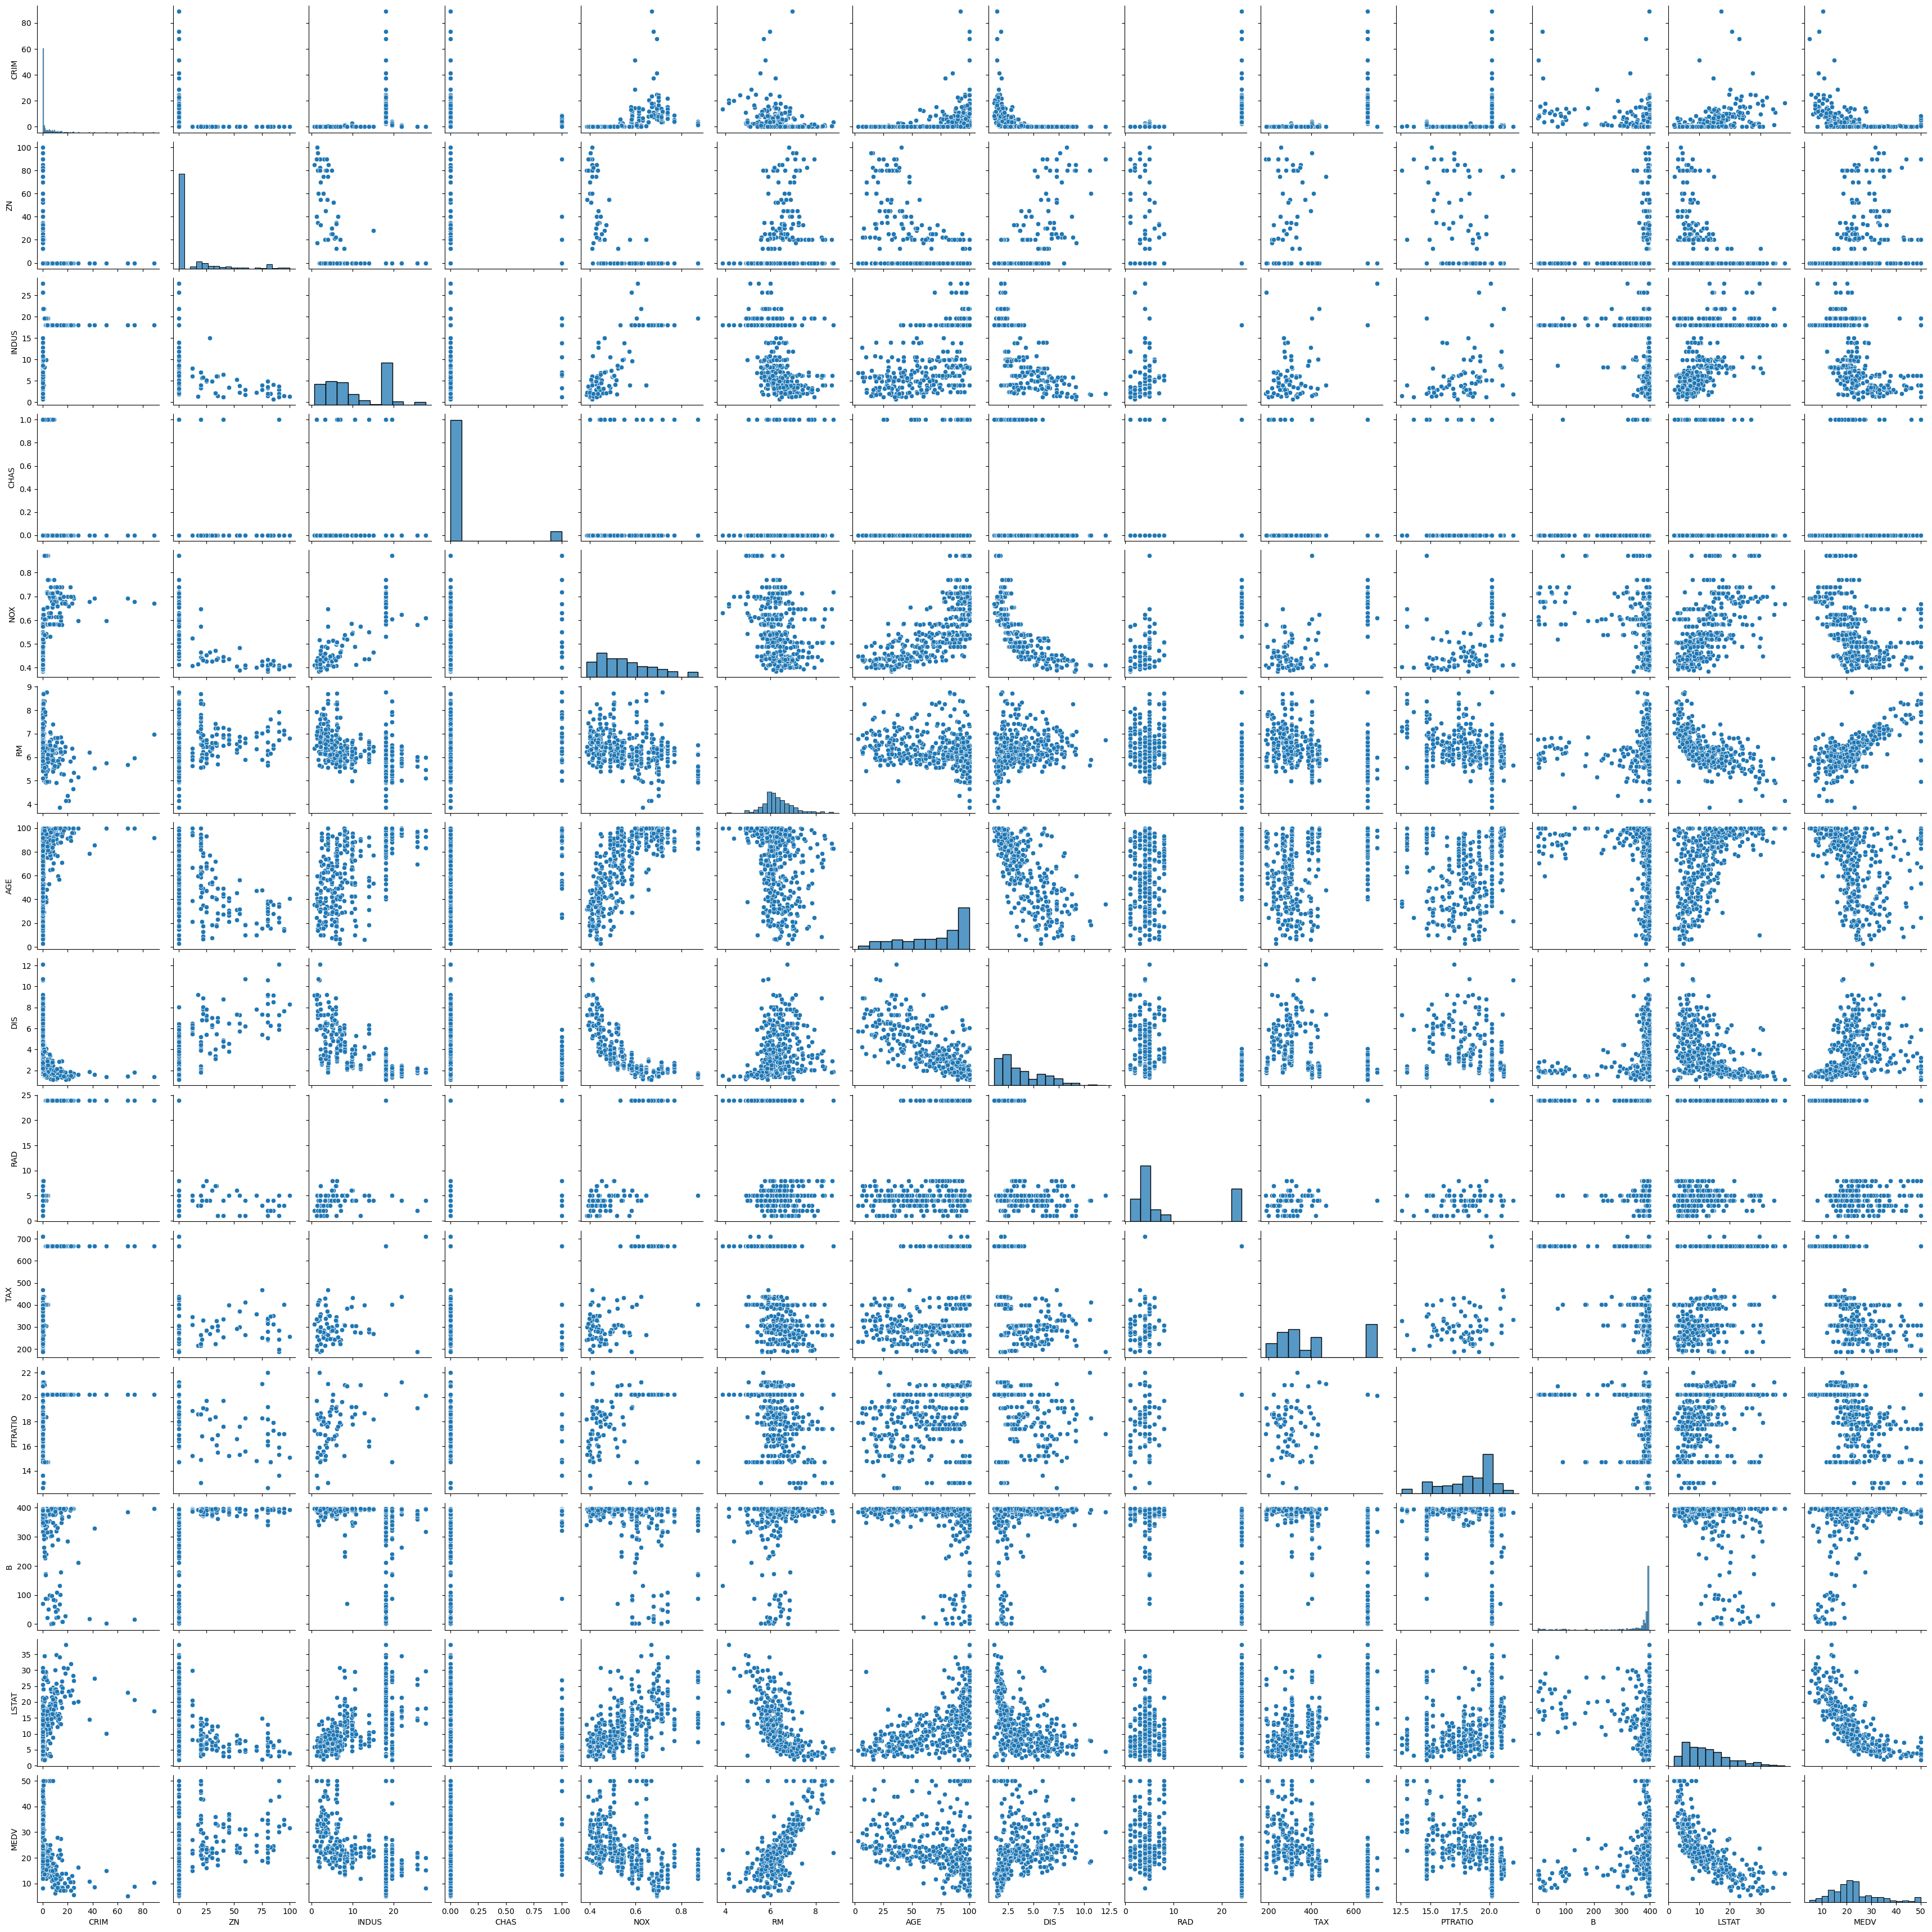

In [162]:
sns.pairplot(boston_data)

*from the paiplot above it signifies that MEDV has major correlation with CRIM,INDUS,NOX,RM,AGE,DIS,LSTAT*

In [163]:
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,-0.356858,0.414142,-0.380091
ZN,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,0.178652,-0.396572,0.309504
INDUS,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,-0.363151,0.603644,-0.470546
CHAS,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,0.041666,-0.070652,0.190642
NOX,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,-0.368034,0.593862,-0.415768
RM,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,0.113347,-0.612577,0.710680
AGE,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,-0.265186,0.571051,-0.340216
DIS,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,0.291122,-0.494921,0.235114
RAD,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,-0.439387,0.480301,-0.387467
TAX,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,-0.442027,0.530632,-0.459795


<Axes: >

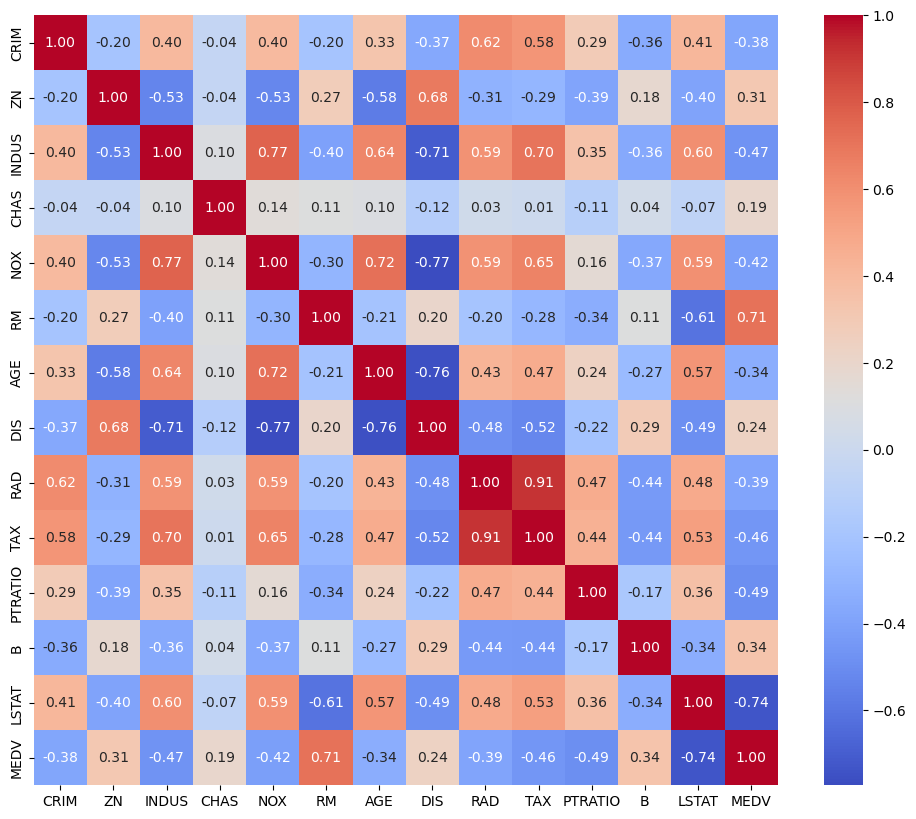

In [260]:
plt.figure(figsize=(12, 10))
sns.heatmap(boston_data.corr(),annot=True, cmap='coolwarm', fmt=".2f")

<Axes: >

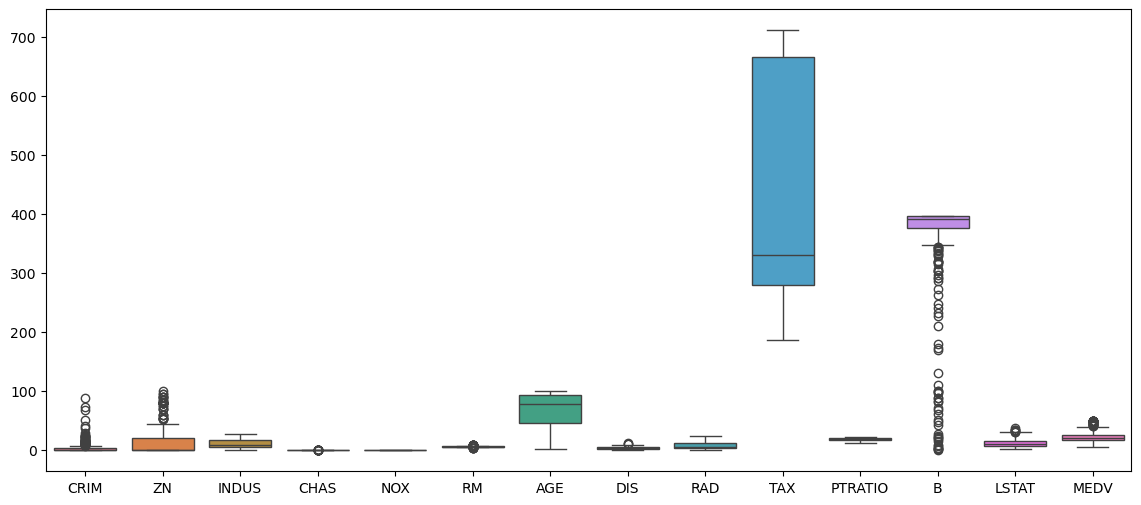

In [165]:
plt.figure(figsize=(14,6))
sns.boxplot(boston_data)

<Axes: xlabel='MEDV', ylabel='CRIM'>

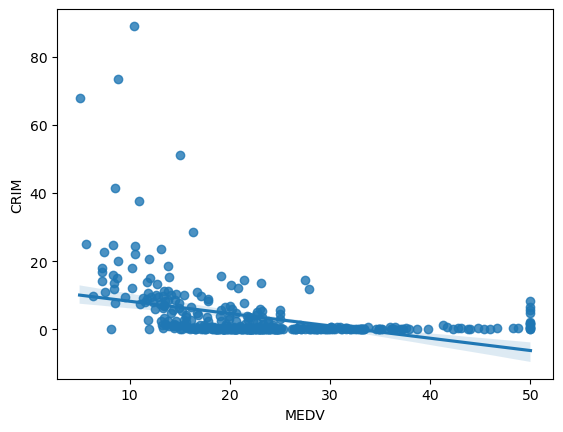

In [185]:
sns.regplot(boston_data,y='CRIM',x='MEDV')

### Creating target (dependent variables) and predictors (independent variables)

In [281]:
# X=boston_data[['ZN', 'CHAS','RM', 'DIS', 'RAD', 'TAX',
#        'B']]
X=boston_data.drop('MEDV',axis=1)
y=boston_data['MEDV']

### Linear Regression

In [282]:
#train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=78)

#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#fitting model
lr.fit(X_train_scaled,y_train)

# lr.intercept_
# lr.coef_

LinearRegression()

### Prediction

In [283]:
y_pred=lr.predict(X_test_scaled)

### Evaluation

In [284]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(boston_data.MEDV.mean())

3.555364307438512
27.48712653891051
5.2428166608141575
22.796534653465343


In [285]:
eval_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Testing_set_boston.csv')

In [286]:
predict_eval=lr.predict(eval_data)

C:\Users\bharath.m\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [287]:
submission = pd.DataFrame({'prediction': predict_eval})
submission.to_csv('boston_data_medv.csv', index=False)